# Logistic Regression from a Neural Network Point of View 


## **1 - Imports**

In [1]:
import numpy as np                  # Scientific computing
import matplotlib.pyplot as plt     # plot graphs
import matplotlib.lines as mlines
import sklearn.datasets
import h5py                         # work with dataset stored in H5 files
import scipy                        # use your own pictures
from PIL import Image               # use your own pictures
from scipy import ndimage
from scipy.special import expit     # expit is the sigmoid function
import pandas as pd
from numpy import random

%matplotlib inline

## **2 - Dataset & Preprocessing**

Input, Output: X1_, Y1_

Number of features: n = 2

Number of instances/samples: m = 100

In [2]:
# Generate the data points. 
# n = number of feautures
# m = number of instances/samples
# return X: array containing one data point per column : shape (n,m) 
def generate_points(m, n, seed=43):
    random.seed(seed)
    X = np.random.uniform(-1, 1, size=(m, n))
    return X

In [3]:
# Generate random decision boundary
# return w: weight vector representing decision boundary, of shape (3,1)
def random_boundary(seed=90):
    rng = np.random.RandomState(seed)

    # generate two random points A and B
    # sample = np.rng.standard_normal(size=(2,2))
    sample = rng.uniform(-1, 1, size=(2, 2))

    # calculate vector w
    x_values = sample[:,0]
    y_values = sample[:,1] 

    if x_values[1] ==  x_values[0]:
      w0 = - x_values[1] # egal, - x_values[0] ist also möglich
      w1 = 1
      w2 = 0
    elif y_values[1] == y_values[0] :
      w0 = - y_values[1]
      w1 = 0
      w2 = 1
    else : 
      m = (y_values[1] - y_values[0])/ (x_values[1] - x_values[0])
      w0 = -m*x_values[0] + y_values[0]
      w1 = m
      w2 = -1
      
    w = [w0, w1, w2]
    w = np.reshape(w, (3,1))
    return w

In [4]:
def predict(X, w):

  pred_class = []
  preds = scipy.special.expit(np.matmul(np.transpose(w), X))
  # if probability >= 0.5 --> round up to 1
  # if probability < 0.5 --> round up to 1
  pred_class = [1 if i >= 0.5 else 0 for i in preds[0]]
  #print(preds)
  return np.array(pred_class)

In [5]:
X1_raw = generate_points(m = 100, n = 2)
X1_raw

array([[-0.76989087,  0.21813308],
       [-0.73321807, -0.51882076],
       [-0.34572189,  0.71827498],
       [ 0.33218043,  0.08232442],
       [-0.94197235,  0.46749659],
       [-0.21009996,  0.60409424],
       [-0.49115775, -0.88623013],
       [ 0.73329728, -0.55794201],
       [-0.1900211 , -0.36780706],
       [-0.8466746 ,  0.68644939],
       [ 0.6978783 ,  0.94293018],
       [-0.22924617,  0.90897625],
       [-0.10848328,  0.3394493 ],
       [-0.8349999 ,  0.79419716],
       [-0.403993  , -0.47539035],
       [-0.9897409 ,  0.08640503],
       [-0.04880727,  0.27274736],
       [ 0.95640827,  0.81732552],
       [ 0.82030615,  0.05051134],
       [-0.7919621 , -0.63817081],
       [ 0.90608044, -0.17609403],
       [ 0.73003424,  0.34435456],
       [ 0.25757159, -0.44888245],
       [ 0.79349454, -0.58621726],
       [-0.19118951,  0.98714498],
       [ 0.47145416, -0.10987718],
       [ 0.12132634, -0.17748902],
       [ 0.45397598, -0.20160623],
       [ 0.34029033,

In [6]:
w = random_boundary()
w

array([[-0.06211109],
       [ 0.89713954],
       [-1.        ]])

In [9]:
# We need one Datapoint per column 
# X1_raw has shape (100,2), one row per instance
# transpose to (2, 100), one column per instance
X1 = np.transpose(X1_raw)

# check shape
print(X1.shape)

(2, 100)


In [10]:
# Extend every input by x_0 = 1 and check shape
X = np.vstack((np.ones((1,100)), X1))

# check shape
print(X.shape)

(3, 100)


In [11]:
Y1_raw = predict(X, w)
Y1_raw

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [12]:
# reshape Y1 from (100,) to (1, 100)
Y1 = Y1_raw.reshape(1, Y1_raw.shape[0])
Y = Y1
# check shape
print(Y1.shape)

(1, 100)


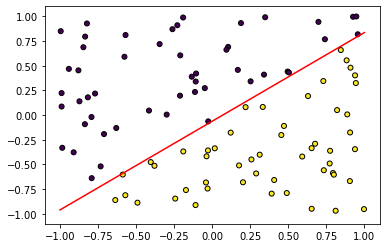

In [13]:
# Visualize the data:
fig, ax = plt.subplots()
ax.scatter(X1_raw[:, 0], X1_raw[:, 1], marker='o', c=Y1_raw, s=25, edgecolor='k')

# the decision boundary chracterized by vector w
xp = np.array((-1,1))
yp = -(w[1]/w[2]) * xp - (w[0]/w[2])

plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.plot(xp, yp, "r-") # decision boundary
plt.show()

In [14]:
df = pd.DataFrame(X)
df = df.append(pd.DataFrame(Y), ignore_index = True)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,-0.769891,-0.733218,-0.345722,0.332180,-0.941972,-0.210100,-0.491158,0.733297,-0.190021,-0.846675,...,0.943838,-0.817100,-0.576838,-0.299388,0.407078,0.202119,0.653157,0.093394,0.938134,-0.823252
2,0.218133,-0.518821,0.718275,0.082324,0.467497,0.604094,-0.886230,-0.557942,-0.367807,0.686449,...,0.323942,0.179462,0.590151,0.004873,-0.656745,-0.679931,-0.334597,0.661421,-0.344930,0.926978
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000


In [15]:
def generate_dataset(m, n, seed1, seed2):
    X1_raw = generate_points(m, n, seed1)
    X1 = np.transpose(X1_raw)
    X = np.vstack((np.ones((1,100)), X1))

    w = random_boundary(seed2)

    Y1_raw = predict(X, w)
    Y1 = Y1_raw.reshape(1, Y1_raw.shape[0])
    Y = Y1

    return X, Y, w

In [16]:
def plot(X, Y, w):
  # Visualize the data:
  fig, ax = plt.subplots()
  X1 = np.transpose(X)
  ax.scatter(X1[:, 1], X1[:, 2], marker='o', c=predict(X,w), s=25, edgecolor='k')

  # the decision boundary chracterized by vector w
  xp = np.array((-1,1))
  yp = -(w[1]/w[2]) * xp - (w[0]/w[2])

  plt.axis([-1.1, 1.1, -1.1, 1.1])
  plt.plot(xp, yp, "r-") # decision boundary
  plt.show()

In [17]:
X, Y, w = generate_dataset(100, 2, 56, 67)
df = pd.DataFrame(X)
df = df.append(pd.DataFrame(Y), ignore_index = True)
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.968384,0.347403,-0.291107,-0.504301,0.754603,-0.347733,0.668435,0.295090,0.699481,-0.118263,...,-0.545233,0.273549,-0.621868,-0.321674,-0.884612,-0.777022,0.067460,0.819758,-0.906281,0.962714
2,-0.333175,-0.607219,0.626732,-0.082777,-0.216683,-0.819810,-0.807577,0.099008,-0.469365,0.761771,...,-0.357984,0.335698,0.461922,0.115326,0.721441,-0.626631,-0.050359,0.956502,-0.918007,-0.065409
3,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000


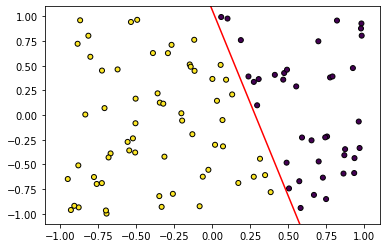

In [18]:
plot(X, Y, w)

## **3 - Implement your functions**

Complete the function implementations below. Replace the "None" instances with your code.

### **Parameter Initialization**



In [19]:
def init_parameters(n):
  np.random.seed(2)
  # -- start of your code
  w = np.zeros((n+1,1))
  # -- end of your code

  assert(w.shape == (n+1,1))
  return (w)

### **One Forward Pass**
$A = \sigma(w^T X) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$

In [20]:
def forward_pass(X, w):
  # Hint: use scipy.special.expit as sigmoid function
  # -- start of your code
  A = scipy.special.expit(np.matmul(np.transpose(w), X))
  # -- end of your code
  
  assert(A.shape == (1, X.shape[1]))
  return A

# The expit function, also known as the logistic sigmoid function, 
# is defined as expit(x) = 1/(1+exp(-x)) 
# exp(-x) = e^-x

### **Calculating the Loss (Cross-Entropy Loss)**

$$\mathcal{L}(A,Y) = -Y\log(A)-(1-Y)\log(1-A)\tag{5}$$

In [21]:
def calculate_loss(A, Y):

  # -- start of your code
  L = -Y * np.log(A) + -(1-Y) * np.log(1-A)
  # -- end of your code
  
  assert(L.shape == Y.shape)
  return L

### **Calculating the Cost**

Averaging over the Losses: 

$$J = \frac{1}{m} np.sum(L)\tag{6}$$


$$J(A,Y) = \frac{1}{m}np.sum(-Y\log(A)-(1-Y)\log(1-A))\tag{7}$$

In [22]:
def calculate_cost(m, loss):

  # -- start of your code
  cost = (1/m)*np.sum(loss)
  # -- end of your code
  
  assert(isinstance(cost, float) or isinstance(cost, int))
  cost = np.squeeze(cost)
  assert(cost.shape == ())

  return(cost)

### **Calculating the Gradients**

$$dw := \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{8}$$


In [23]:
def calculate_gradients(m, X, Y, A):

  # -- start of your code
  dw = (1/m)*np.matmul(X, np.transpose((A-Y)))
  # -- end of your code

  assert(dw.shape == (X.shape[0],1))
  return dw

### **One Optimization/Learning Step**

$$w = w - \alpha \ dw\tag{10}$$

In [24]:
def update_parameters(w, dw, learning_rate = 0.01):

  # -- start of your code
  w_new = w - learning_rate*dw
  # -- end of your code

  assert(w_new.shape == w.shape)
  return w_new

## **4 - One training step**

Test your functions

In [25]:
X, Y, w_ = generate_dataset(100, 2 ,67, 80) 

In [26]:
# dataset stored in X and Y
n = X.shape[0] - 1  # number of features
m = X.shape[1]      # number of examples/datapoints
n

2

In [27]:
# init
w = init_parameters(n)
print(w)

[[0.]
 [0.]
 [0.]]


In [28]:
# forward pass
A = forward_pass(X, w)
print(A)

[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
  0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]]


In [29]:
# loss
loss = calculate_loss(A,Y)
print(loss)

[[0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.69314718 0.69314718
  0.69314718 0.69314718 0.69314718 0.69314718 0.

In [30]:
# cost
cost = calculate_cost(m,loss)
print(cost)

0.6931471805599453


In [31]:
# calculate gradients
dw = calculate_gradients(m, X, Y, A)
print ("dw = " + str(dw))

dw = [[-0.2       ]
 [-0.04168061]
 [ 0.2548799 ]]


In [32]:
# update parameters

# Note: The size of the step is controlled by the learning_rate
learning_rate = 0.001

print("Parameters and Cost Before Update")
print("w = " + str(w))
print("Cost = " + str(cost))

w = update_parameters(w,dw, learning_rate)

print("\nParameters and Cost After Update")
print("w = " + str(w))

A = forward_pass(X, w)
loss = calculate_loss(A,Y)
cost = calculate_cost(m, loss)
print("Cost = " + str(cost))

Parameters and Cost Before Update
w = [[0.]
 [0.]
 [0.]]
Cost = 0.6931471805599453

Parameters and Cost After Update
w = [[ 2.00000000e-04]
 [ 4.16806085e-05]
 [-2.54879900e-04]]
Cost = 0.6930404890638052


## **5 - Gradient Descent**

Train a logistic regression model, i.e. optimize the parameters

In [33]:
# dataset
n = X.shape[0] - 1  # number of features
m = X.shape[1]      # number of examples/datapoints

# init parameters, set hyperparameters
w = init_parameters(n)
learning_rate = 0.1
num_iterations = 2000
costs = []
print_cost = True

for i in range(num_iterations):
  # -- start of your code
  A = forward_pass(X, w)
  loss = calculate_loss(A,Y)
  cost = calculate_cost(m,loss)

  if i % 100 == 0:
    costs.append(cost)

  dw = calculate_gradients(m, X, Y, A)
  w = update_parameters(w,dw, learning_rate)
  # -- end of your code

  if print_cost and i%100 == 0:
    print ("Cost after iteration %i: %f" %(i, cost))

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.320253
Cost after iteration 200: 0.233980
Cost after iteration 300: 0.193583
Cost after iteration 400: 0.169613
Cost after iteration 500: 0.153432
Cost after iteration 600: 0.141600
Cost after iteration 700: 0.132468
Cost after iteration 800: 0.125143
Cost after iteration 900: 0.119095
Cost after iteration 1000: 0.113987
Cost after iteration 1100: 0.109597
Cost after iteration 1200: 0.105767
Cost after iteration 1300: 0.102385
Cost after iteration 1400: 0.099370
Cost after iteration 1500: 0.096656
Cost after iteration 1600: 0.094197
Cost after iteration 1700: 0.091953
Cost after iteration 1800: 0.089894
Cost after iteration 1900: 0.087995


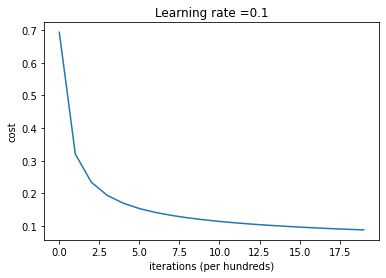

In [34]:
# Plot learning curve (with costs)
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [35]:
# Evaluate your model - how many points are classified correctly?

# -- start of your code

y_pred = predict(X, w)
accuracy = 1 - np.mean(np.abs(Y - y_pred))

# -- end of your code

print("Train accuracy: {} %".format(accuracy))

Train accuracy: 0.99 %


##6 - Experiment

In [36]:
def experiment(learning_rate) : 
  # dataset
  n = X.shape[0] - 1  # number of features
  m = X.shape[1]      # number of examples/datapoints

  # init parameters, set hyperparameters
  w = init_parameters(n)
  num_iterations = 2000
  costs = []
  print_cost = False

  for i in range(num_iterations):
    # -- start of your code
    A = forward_pass(X, w)
    loss = calculate_loss(A,Y)
    cost = calculate_cost(m,loss)

    if i % 100 == 0:
      costs.append(cost)

    dw = calculate_gradients(m, X, Y, A)
    w = update_parameters(w,dw, learning_rate)
    # -- end of your code

    if print_cost and i%100 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
  
  return costs

In [37]:
def visualize(costs, learning_rate):
  # Plot learning curve (with costs)
  costs = np.squeeze(costs)
  plt.plot(costs)
  plt.ylabel('cost')
  plt.xlabel('iterations (per hundreds)')
  plt.title("Learning rate =" + str(learning_rate))
  plt.show()
  print("\n\n\n\n")

In [38]:
exp_01 = experiment(0.1)
exp_001 = experiment(0.01)
exp_0001 = experiment(0.001)

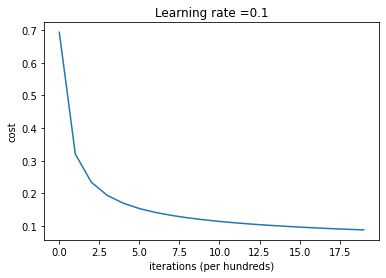

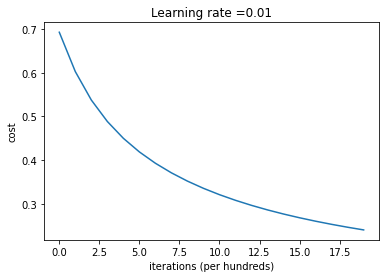

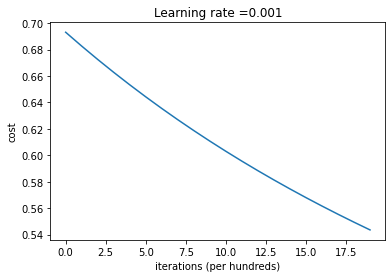

In [39]:
visualize(exp_01,0.1)
visualize(exp_001,0.01)
visualize(exp_0001,0.001)